# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**   - Prathik Mane


# **Project Summary -**

* The aim of the project is to identify major themes/topics across a collection of BBC news articles by using clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA). The dataset used in the project is comprehensive and consists of 2225 rows, providing a substantial amount of data for analysis. Moreover, it is noted that there are no null values present in the dataset and 98 duplicate values are present.

* Before applying clustering algorithms, the dataset has undergone preprocessing steps such as text cleaning, tokenization, and removing stopwords and punctuation. This helps to enhance the quality of the text data and improve the clustering results.

* In order to represent the textual data in a format suitable for clustering algorithms, different feature extraction techniques are employed. CountVectorizer and TFIDF Vectorizer were used to convert the text into numerical representations, capturing the frequency or importance of words in the documents.

* The project explores different clustering algorithms, namely Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), and probabilistic Latent Semantic Analysis (pLSA). By implementing multiple models, we can compare their performance and identify the most effective algorithm for discovering major themes/topics in the BBC news articles.

* To assess the performance of the clustering models, perplexity and log-likelihood are utilized as evaluation metrics.

# **GitHub Link -**

https://github.com/Ryansh12/Topic-Modeling-on-News-Articles

# **Problem Statement**


**In this project, we have to identify major themes/topics across a collection of BBC news articles by using clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc. The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. We need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. And Verify whether these topics correspond to the different tags available.**

#### **Define Your Business Objective?**

The objective of this project is to identify major themes/topics across a collection of BBC news articles

# ***Download Dataset***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/bbc /content

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import re
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS as wordcloud_stopwords
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Dataset Loading

In [ ]:
# Sample Data
f = open("/content/bbc/business/001.txt", "r")
Input_Text = f.read()
Input_Text

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [ ]:
# Load Dataset
if not os.path.isfile('preprocessed_documents.csv'):
    data = pd.DataFrame()
    path = "bbc/"
    # Loop over folders only and not file(Like here README.txt)
    for directoryname in tqdm([directoryname for directoryname in os.listdir(path) if os.path.isdir(os.path.join(path, directoryname))]):
      for filename in os.listdir(os.path.join(path,directoryname)):
          f = open(os.path.join(path, directoryname, filename), "r", encoding='unicode_escape')
          Input_text = f.read()
          category_name = directoryname
          record = pd.DataFrame([{

                                  "Text": Input_text,
                                  "category": category_name

                                }])
          data = pd.concat([data, record], ignore_index=True)

    data.to_csv('preprocessed_documents.csv', index=False)
    data = pd.read_csv('preprocessed_documents.csv')
else:
    data = pd.read_csv('preprocessed_documents.csv')

100%|██████████| 5/5 [00:27<00:00,  5.48s/it]


### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Text,category
0,Yukos unit buyer faces loan claim\n\nThe owner...,business
1,Ad sales boost Time Warner profit\n\nQuarterly...,business
2,Dollar gains on Greenspan speech\n\nThe dollar...,business
3,US trade gap hits record in 2004\n\nThe gap be...,business
4,High fuel prices hit BA's profits\n\nBritish A...,business


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(2225, 2)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2225 non-null   object
 1   category  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

98

In [ ]:
# print Duplicate rows
data[data.duplicated()]

,Text,category
237,Economy 'strong' in election year\n\nUK busine...,business
272,Jobs growth still slow in the US\n\nThe US cre...,business
340,S Korea spending boost to economy\n\nSouth Kor...,business
345,Troubled Marsh under SEC scrutiny\n\nThe US st...,business
369,Singapore growth at 8.1% in 2004\n\nSingapore'...,business
...,...,...
1816,Holmes starts 2005 with GB events\n\nKelly Hol...,sport
1965,Spain coach faces racism inquiry\n\nSpain's Fo...,sport
1975,Ferguson rues failure to cut gap\n\nBoss Sir A...,sport
2137,Bortolami predicts dour contest\n\nItaly skipp...,sport


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# shape after dropping duplicates
data.shape

(2127, 2)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isna().sum()

Text        0
category    0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Text', 'category'], dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Text,category
count,2127,2127
unique,2127,5
top,Yukos unit buyer faces loan claim\n\nThe owner...,sport
freq,1,505


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data['category'].value_counts()

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: category, dtype: int64

We can say that "Sports" & "Business" categories have more data as compared to other categories

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: >

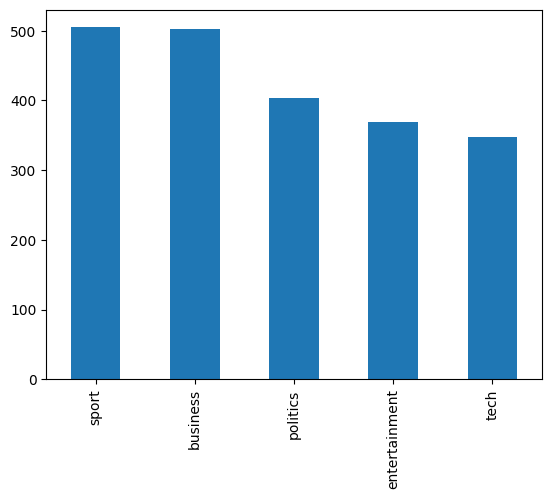

In [ ]:
# Chart - 1 visualization code
data['category'].value_counts().plot(kind='bar')

We can say that "Sports" & "Business" categories have more data as compared to other categories

#### Chart - 2

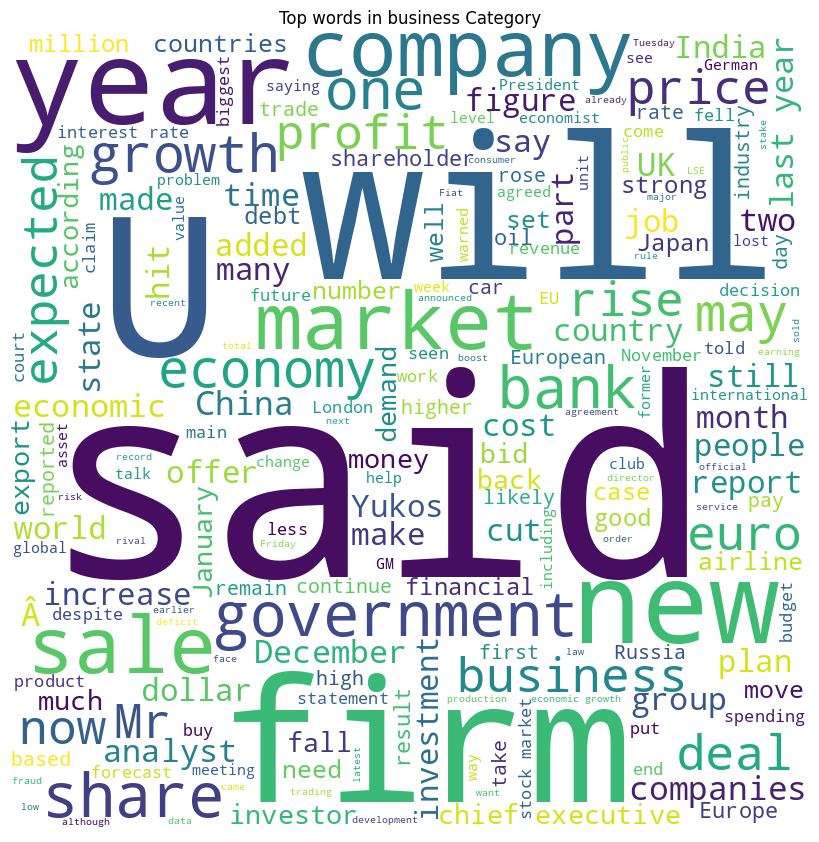

In [ ]:
category_words = ''
stopwords = set(wordcloud_stopwords)

for row in data[data['category']=='business']['Text']:
    tokens = str(row).split()
    category_words += " ".join(tokens)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(category_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top words in business Category")
plt.show()

Based on the words such as "company", "cost", "profit", "economy" and "bank" it can be inferred that the category being discussed is related to business.

#### Chart - 3

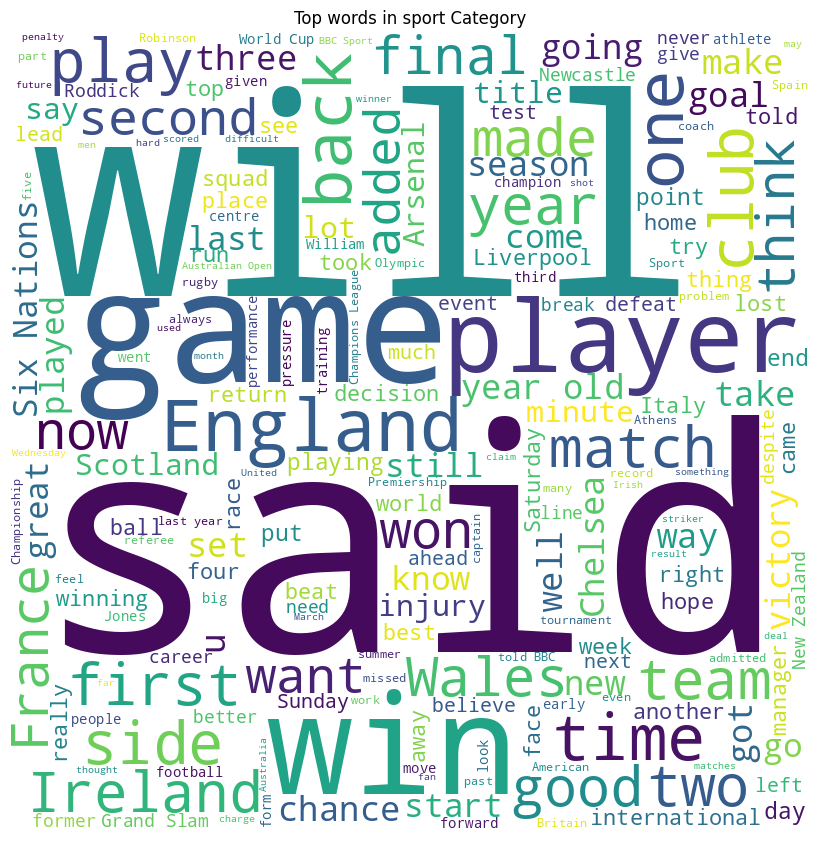

In [ ]:
category_words = ''
stopwords = set(wordcloud_stopwords)

for row in data[data['category']=='sport']['Text']:
    tokens = str(row).split()
    category_words += " ".join(tokens)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(category_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top words in sport Category")
plt.show()

Based on the words such as "game", "chelsea", "win", "player" and "team" it can be inferred that the category being discussed is related to sport.

#### Chart - 4

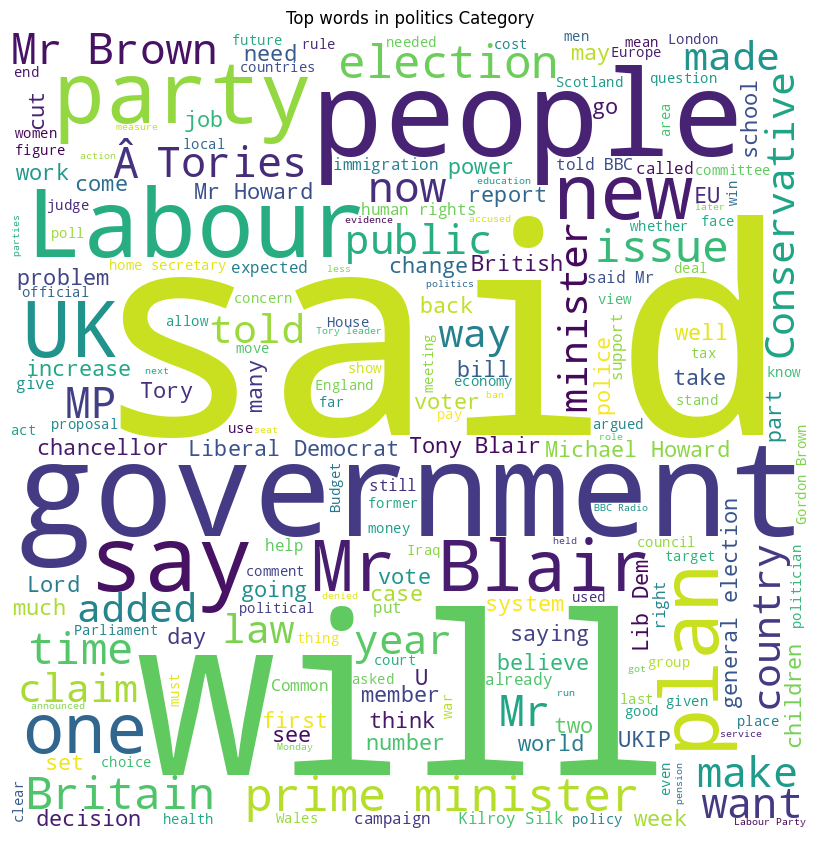

In [ ]:
category_words = ''
stopwords = set(wordcloud_stopwords)

for row in data[data['category']=='politics']['Text']:
    tokens = str(row).split()
    category_words += " ".join(tokens)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(category_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top words in politics Category")
plt.show()

Based on the words such as "government", "party", "people", "election" and "vote" it can be inferred that the category being discussed is related to politics.

#### Chart - 5

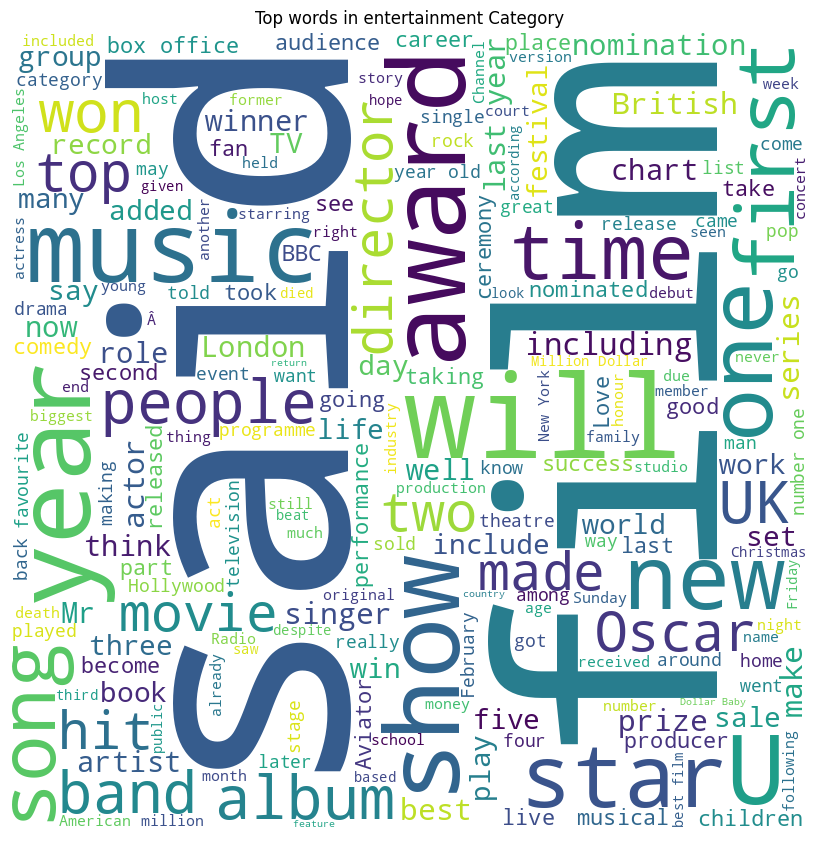

In [ ]:
category_words = ''
stopwords = set(wordcloud_stopwords)

for row in data[data['category']=='entertainment']['Text']:
    tokens = str(row).split()
    category_words += " ".join(tokens)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(category_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Top words in entertainment Category")
plt.show()

Based on the words such as "film", "movie", "song", "oscar" and "director" it can be inferred that the category being discussed is related to entertainment.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
def preprocess(text):
    """ preprocessing text """

    #TEXT
    #Delete all the tags like "< anyword >"
    text=re.sub('<[^>]*>'," ",text)

    #Delete all the data which are present in the brackets.
    text=re.sub('\([^)]*\)'," ",text)

    #Remove all the newlines('\n'), tabs('\t'), "-", "\".
    text=re.sub('\\r'," ",text)
    text=re.sub('\\t'," ",text)
    text=re.sub('\\n'," ",text)
    text=re.sub('-'," ",text)
    text=re.sub(r'\\'," ",text)

    #Decontractions, replace words like below to full words.
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    # removing extra white spaces
    text = re.sub(' +',' ',text).strip()

    #Replace all the digits with space i.e delete all the digits.
    text = re.sub('[0-9]',"", text)

    #Convert all the words into lower case and lowe case
    #and remove the words which are greater than or equal to 15 or less than or equal to 2
    text = text.lower()

    # removing words greater than or equal to 15
    text = re.sub('[a-zA-Z]{15,}'," ",text)

    # removing words length equal to 2
    text = re.sub('(?<![a-zA-Z])[a-zA-Z]{2}(?![a-zA-Z])'," ",text)

    # removing words length equal to 1
    text = re.sub('(?<![a-zA-Z])[a-zA-Z]{1}(?![a-zA-Z])'," ",text)

    #replace all the words except "A-Za-z_" with space.
    text = re.sub('[^A-Za-z_]+', ' ', text)


    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = [word for word in word_tokens if not word in stop_words]
    text = " ".join(text)
    # removing extra white spaces
    text = re.sub(' +',' ',text).strip()

    return text

In [ ]:
data['Text'] = data['Text'].map(lambda x: preprocess(x))

#### Text Vectorization

In [ ]:
# Applying BOW vectorization
def BOW_Vectorizer(preprocessed_text):
  preprocessed_text_values = data[preprocessed_text].values

  vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=10000)
  # Bag of words - document term matrix
  BOW_dtm = vectorizer.fit_transform(preprocessed_text_values)
  return  vectorizer, BOW_dtm

In [ ]:
BOW_vectorizer, BOW_dtm = BOW_Vectorizer('Text')

In [ ]:
# Applying TF-IDF vectorization
def Tfidf_Vectorizer(preprocessed_text):

  # words that appear in atleast 2 documents. (min_df)
  vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
  # TF_IDF - document term matrix
  TFIDF_dtm = vectorizer.fit_transform(data[preprocessed_text])
  return vectorizer, TFIDF_dtm

In [ ]:
TFIDF_vectorizer, TFIDF_dtm = Tfidf_Vectorizer('Text')

## ***7. ML Model Implementation***

### ML Model - 1

# LDA using CountVectorizer

LDA (Latent Dirichlet Allocation) is a popular topic modeling technique used to uncover latent topics within a collection of documents. It is a generative probabilistic model that assumes each document is a mixture of multiple topics, and each topic is a probability distribution over words.

In [ ]:
%%time

# Perform Hyperparameter Tuning.

# not hyperparameter tuning n_components(no of topics) as we already know we have topics from 5 category, so restricting n_components to 5
params = {'doc_topic_prior': [0.1, 0.5, 1.0], 'topic_word_prior': [0.01, 0.1, 1.0]}

lda_BOW = LatentDirichletAllocation(n_components = 5, learning_method='online', random_state=0)

lda_BOW_grid= GridSearchCV(lda_BOW, param_grid=params,n_jobs=-1,  cv= 10, verbose=5,return_train_score=True)
# cv =10 i.e 10 fold

lda_BOW_grid.fit(BOW_dtm)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
CPU times: user 14.2 s, sys: 650 ms, total: 14.8 s
Wall time: 16min 12s


GridSearchCV(cv=10,
             estimator=LatentDirichletAllocation(learning_method='online',
                                                 n_components=5,
                                                 random_state=0),
             n_jobs=-1,
             param_grid={'doc_topic_prior': [0.1, 0.5, 1.0],
                         'topic_word_prior': [0.01, 0.1, 1.0]},
             return_train_score=True, verbose=5)

In [ ]:
lda_BOW_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_doc_topic_prior', 'param_topic_word_prior', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
train_score = lda_BOW_grid.cv_results_['mean_train_score']
cv_score = lda_BOW_grid.cv_results_['mean_test_score']
best_doc_topic_prior=lda_BOW_grid.best_params_['doc_topic_prior']
best_topic_word_prior=lda_BOW_grid.best_params_['topic_word_prior']
# the default scoring metric used in GridSearchCV is the log-likelihood score
lda_BOW_log_likelihood = lda_BOW_grid.best_score_
lda_BOW_best_model = lda_BOW_grid.best_estimator_
perplexity_BOW_lda = lda_BOW_best_model.perplexity(BOW_dtm)

In [ ]:
print("Train Score:", train_score)
print("\nCV Score:", cv_score)
print("\nBest doc_topic_prior:", best_doc_topic_prior)
print("\nBest topic_word_prior:", best_topic_word_prior)
print("\nBest Score(log-likelihood):", lda_BOW_log_likelihood)
print("\nLDA Perplexity:", perplexity_BOW_lda)

Train Score: [-3021372.72319618 -2978525.71767357 -2972881.56688553 -3019758.94918127
 -2978181.25883462 -2978253.49258724 -3012275.53158907 -2971539.10435424
 -2982935.89661176]

CV Score: [-478541.57425517 -404505.77030765 -404035.77930566 -478427.43060608
 -403926.04750669 -404884.3288447  -478898.40745729 -403593.09643931
 -405481.04736653]

Best doc_topic_prior: 1.0

Best topic_word_prior: 0.1

Best Score(log-likelihood): -403593.0964393119

LDA Perplexity: 3063.476878352038


* The log-likelihood score measures how well the LDA model fits the data. In this case, the LDA model with CountVectorizer achieved a relatively high negative log-likelihood score of -403593.0964393119, indicating a good fit to the news articles. A lower log-likelihood score suggests a better fit and a higher likelihood of the model accurately capturing the underlying topic structure.

* The perplexity value, on the other hand, provides an estimate of how well the model generalizes to unseen data. In this case, the LDA model with CountVectorizer achieved a perplexity value of 3063.476878352038. A lower perplexity value indicates a better ability to generalize, suggesting that the model has a good understanding of the overall topic distribution and can effectively predict topics for unseen documents.

In [ ]:
lda_BOW = LatentDirichletAllocation(doc_topic_prior = best_doc_topic_prior, topic_word_prior = best_topic_word_prior, n_components = 5, learning_method='online', random_state=0)
lda_BOW.fit(BOW_dtm)

LatentDirichletAllocation(doc_topic_prior=1.0, learning_method='online',
                          n_components=5, random_state=0, topic_word_prior=0.1)

In [ ]:
# components_ to fetch a topic
for i, topic in enumerate(lda_BOW.components_):
    print(f'Top 10 words for Topic {i+1}:')
    # argsort() to sort the words based on probability values and fetch their indices
    for j in (topic.argsort()[-10:]):
        print(BOW_vectorizer.get_feature_names_out()[j], end=" ")
    print('\n')

Top 10 words for Topic 1:
use games could mobile also technology one new music people 

Top 10 words for Topic 2:
new also minister blair party election labour people government would 

Top 10 words for Topic 3:
also time two win first one year film game best 

Top 10 words for Topic 4:
companies could deal market also new firm year would company 

Top 10 words for Topic 5:
ireland second economy growth england france set first last year 



In [ ]:
news_topics = lda_BOW.transform(BOW_dtm)
news_topics.shape
data['Topic'] = news_topics.argmax(axis=1)
data.head()

,Text,category,Topic
0,yukos unit buyer faces loan claim owners embat...,business,3
1,sales boost time warner profit quarterly profi...,business,3
2,dollar gains greenspan speech dollar hit highe...,business,4
3,trade gap hits record gap exports imports hit ...,business,4
4,high fuel prices hit profits british airways b...,business,3


In [ ]:
data.groupby(['category', 'Topic']).count()

Text
category      Topic      
business      0         9
              1        20
              2         1
              3       354
              4       119
entertainment 0        46
              1        14
              2       302
              3         3
              4         4
politics      0         1
              1       387
              2         4
              3        10
              4         1
sport         1         2
              2       441
              3         1
              4        61
tech          0       314
              1         6
              2        11
              3        16

In [ ]:
# So here we will map the topic number to category
grouped_data =data[['category','Topic']].value_counts().reset_index(name='counts')
max_count_rows = grouped_data.loc[grouped_data.groupby('category')['counts'].idxmax()]
max_count_rows

,category,Topic,counts
2,business,3,354
4,entertainment,2,302
1,politics,1,387
0,sport,2,441
3,tech,0,314


* Topic **3** is mapped to **business**
* Topic **2** is mapped to **entertainment**
* Topic **1** is mapped to **politics**
* Topic **2** is mapped to **sport**
* Topic **0** is mapped to **tech**

So here we can see that topic 2 is mapped two categories entertainment and sport, which is not correct

### ML Model - 2

# LDA using TFIDF vectorizer

In [ ]:
%%time

# Perform Hyperparameter Tuning.

# not hyperparameter tuning n_components(no of topics) as we already know we have topics from 5 category, so restricting n_components to 5
params = {'doc_topic_prior': [0.1, 0.5, 1.0], 'topic_word_prior': [0.01, 0.1, 1.0]}

lda_TFIDF = LatentDirichletAllocation(n_components = 5, learning_method='online', random_state=0)

lda_TFIDF_grid= GridSearchCV(lda_TFIDF, param_grid=params,n_jobs=-1,  cv= 10, verbose=5,return_train_score=True)
# cv =10 i.e 10 fold

lda_TFIDF_grid.fit(TFIDF_dtm)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
CPU times: user 5.55 s, sys: 215 ms, total: 5.76 s
Wall time: 5min 56s


GridSearchCV(cv=10,
             estimator=LatentDirichletAllocation(learning_method='online',
                                                 n_components=5,
                                                 random_state=0),
             n_jobs=-1,
             param_grid={'doc_topic_prior': [0.1, 0.5, 1.0],
                         'topic_word_prior': [0.01, 0.1, 1.0]},
             return_train_score=True, verbose=5)

In [ ]:
train_score = lda_TFIDF_grid.cv_results_['mean_train_score']
cv_score = lda_TFIDF_grid.cv_results_['mean_test_score']
best_doc_topic_prior=lda_TFIDF_grid.best_params_['doc_topic_prior']
best_topic_word_prior=lda_TFIDF_grid.best_params_['topic_word_prior']
# the default scoring metric used in GridSearchCV is the log-likelihood score
lda_TFIDF_log_likelihood = lda_TFIDF_grid.best_score_
lda_TFIDF_best_model = lda_TFIDF_grid.best_estimator_
perplexity_TFIDF_lda = lda_TFIDF_best_model.perplexity(TFIDF_dtm)

In [ ]:
print("Train Score:", train_score)
print("\nCV Score:", cv_score)
print("\nBest doc_topic_prior:", best_doc_topic_prior)
print("\nBest topic_word_prior:", best_topic_word_prior)
print("\nBest Score(log-likelihood):", lda_TFIDF_log_likelihood)
print("\nLDA Perplexity:", perplexity_TFIDF_lda)

Train Score: [-210166.96173122 -180834.637155   -169959.85335141 -214180.80660693
 -185215.828115   -173752.94707994 -217001.97577343 -188893.50020115
 -175075.4605517 ]

CV Score: [-67259.38859119 -33872.33889931 -23619.17956993 -67933.96867307
 -34321.94428753 -23959.86639063 -73070.54024619 -36798.87660093
 -23696.80319394]

Best doc_topic_prior: 0.1

Best topic_word_prior: 1.0

Best Score(log-likelihood): -23619.179569927568

LDA Perplexity: 16382.276929544098


* The LDA (Latent Dirichlet Allocation) with TFIDF vectorizer technique achieved a log-likelihood score of -23619.179569927568 and a perplexity value of 16382.276929544098.

* A log-likelihood  lower score suggests a better fit, indicating that the LDA model with TFIDF vectorizer was able to capture the underlying topic structure in the news articles effectively.

* A lower perplexity value indicates a better ability to generalize to new documents. In this case, the LDA model with TFIDF vectorizer achieved a relatively high perplexity value of 16382.276929544098 as compared to LDA with Count vectorizer, suggesting that it may not perform as well in predicting topics for unseen news articles.



In [ ]:
lda_TFIDF = LatentDirichletAllocation(doc_topic_prior = best_doc_topic_prior, topic_word_prior = best_topic_word_prior, n_components = 5, learning_method='online', random_state=0)
lda_TFIDF.fit(TFIDF_dtm)

LatentDirichletAllocation(doc_topic_prior=0.1, learning_method='online',
                          n_components=5, random_state=0, topic_word_prior=1.0)

In [ ]:
# components_ to fetch a topic
for i, topic in enumerate(lda_TFIDF.components_):
    print(f'Top 10 words for Topic {i+1}:')
    # argsort() to sort the words based on probability values and fetch their indices
    for j in (topic.argsort()[-10:]):
        print(TFIDF_vectorizer.get_feature_names_out()[j], end=" ")
    print('\n')

Top 10 words for Topic 1:
glazer financial steel company shares sullivan worldcom rover fiat ebbers 

Top 10 words for Topic 2:
last world first film one new also people would year 

Top 10 words for Topic 3:
deficit government growth dollar budget year economic oil japan economy 

Top 10 words for Topic 4:
unit khodorkovsky boerse lse russian deutsche yugansk rosneft gazprom yukos 

Top 10 words for Topic 5:
air market indian jet firm company shares mci india fiat 



In [ ]:
news_topics = lda_TFIDF.transform(TFIDF_dtm)
news_topics.shape
data['Topic'] = news_topics.argmax(axis=1)
data.head()

,Text,category,Topic
0,yukos unit buyer faces loan claim owners embat...,business,1
1,sales boost time warner profit quarterly profi...,business,1
2,dollar gains greenspan speech dollar hit highe...,business,1
3,trade gap hits record gap exports imports hit ...,business,1
4,high fuel prices hit profits british airways b...,business,1


In [ ]:
data.groupby(['category', 'Topic']).count()

,,Text
category,Topic,
business,1,503
entertainment,1,369
politics,1,403
sport,1,505
tech,1,347


In [ ]:
# So here we will map the topic number to category
grouped_data =data[['category','Topic']].value_counts().reset_index(name='counts')
max_count_rows = grouped_data.loc[grouped_data.groupby('category')['counts'].idxmax()]
max_count_rows

,category,Topic,counts
1,business,1,503
3,entertainment,1,369
2,politics,1,403
0,sport,1,505
4,tech,1,347


* Topic **1** is mapped to all the topics i.e **business**, **entertainment**, **politics**, **sport**, **tech**, which is not correct

### ML Model - 3

# pLSA using TFIDF vectorizer
pLSA is equivalent to non-negative matrix factorization using a Kullback-Leibler Divergence

(ref: https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)

* pLSA models the probability distribution of words given topics and topics given documents. It assumes that each word in a document is generated from a specific topic, allowing the model to uncover latent topics within the dataset.

* By utilizing the TFIDF vectorizer, pLSA takes into account the importance of each word in the corpus. This can be particularly useful in capturing the significance of rare or distinctive words in defining topics.

In [ ]:
# error function to be used is Kullback–Leibler divergence
nmf_TFIDF = NMF(n_components=5,random_state=42,solver='mu',beta_loss='kullback-leibler',max_iter=1000)
nmf_TFIDF.fit_transform(TFIDF_dtm)

array([[8.46430091e-12, 3.88559887e-11, 9.42377078e-02, 2.40551221e-16,
        1.62400691e-18],
       [3.84677251e-15, 7.02430290e-08, 8.62689947e-02, 3.67107133e-03,
        3.54316709e-02],
       [2.06179899e-06, 6.58460412e-04, 1.26491347e-01, 8.91812901e-26,
        2.02808773e-14],
       ...,
       [1.05250365e-01, 1.03471904e-20, 3.90654943e-17, 4.10589942e-21,
        3.41667596e-14],
       [1.00126587e-01, 2.05952047e-18, 1.62533195e-19, 2.77820704e-25,
        2.10913201e-19],
       [7.80637689e-02, 5.53302182e-26, 1.85322445e-28, 1.21179360e-27,
        1.71225478e-18]])

In [ ]:
# components_ to fetch a topic
for i, topic in enumerate(nmf_TFIDF.components_):
    print(f'Top 10 words for Topic {i+1}:')
    # argsort() to sort the words based on probability values and fetch their indices
    for j in (topic.argsort()[-10:]):
        print(TFIDF_vectorizer.get_feature_names_out()[j], end=" ")
    print('\n')

Top 10 words for Topic 1:
injury first players team match cup club win game england 

Top 10 words for Topic 2:
howard people minister brown would party blair government election labour 

Top 10 words for Topic 3:
firm china oil sales year economy market company bank growth 

Top 10 words for Topic 4:
album year star band music show award awards best film 

Top 10 words for Topic 5:
broadband music digital software users phone games technology people mobile 



In [ ]:
news_topics = nmf_TFIDF.transform(TFIDF_dtm)
news_topics.shape
data['Topic'] = news_topics.argmax(axis=1)
data.head()

,Text,category,Topic
0,yukos unit buyer faces loan claim owners embat...,business,2
1,sales boost time warner profit quarterly profi...,business,2
2,dollar gains greenspan speech dollar hit highe...,business,2
3,trade gap hits record gap exports imports hit ...,business,2
4,high fuel prices hit profits british airways b...,business,2


In [ ]:
data.groupby(['category', 'Topic']).count()

Text
category      Topic      
business      0         6
              1        27
              2       456
              3         3
              4        11
entertainment 1         6
              2         1
              3       354
              4         8
politics      0         1
              1       393
              2         5
              3         2
              4         2
sport         0       501
              1         2
              3         2
tech          0         2
              1         3
              2         5
              3         4
              4       333

In [ ]:
# So here we will map the topic number to category
grouped_data =data[['category','Topic']].value_counts().reset_index(name='counts')
max_count_rows = grouped_data.loc[grouped_data.groupby('category')['counts'].idxmax()]
max_count_rows

,category,Topic,counts
1,business,2,456
3,entertainment,3,354
2,politics,1,393
0,sport,0,501
4,tech,4,333


* Topic **2** is mapped to **business**
* Topic **3** is mapped to **entertainment**
* Topic **1** is mapped to **politics**
* Topic **0** is mapped to **sport**
* Topic **4** is mapped to **tech**

So here we can see that each topic was mapped to distinct category

pLSA (probabilistic Latent Semantic Analysis) performed well when paired with the TFIDF vectorizer. This indicates that pLSA was able to effectively capture the topic structure within the dataset, leveraging the importance of words based on their frequency and rarity.

### ML Model - 4

# pLSA using CountVectorizer
pLSA is equivalent to non-negative matrix factorization using a Kullback-Leibler Divergence

(ref: https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)

pLSA with CountVectorizer relies solely on word co-occurrence patterns to identify topics. It does not consider the importance of each word based on its frequency in the corpus.

In [ ]:
# error function to be used is Kullback–Leibler divergence
nmf_BOW = NMF(n_components=5,random_state=42,solver='mu',beta_loss='kullback-leibler',max_iter=1000)
nmf_BOW.fit_transform(BOW_dtm)

array([[8.75204556e-12, 2.03648511e-09, 1.84776890e-12, 4.63308879e-15,
        3.93448969e-01],
       [1.43458368e-13, 1.92180638e-02, 6.24530255e-05, 1.30105530e-01,
        4.12382618e-01],
       [3.31815543e-05, 5.81361336e-24, 8.82787210e-04, 9.09030107e-13,
        5.58240613e-01],
       ...,
       [6.74863905e-01, 2.32591654e-17, 1.20251224e-22, 2.10048748e-14,
        1.39864887e-19],
       [4.16915924e-01, 3.77871434e-18, 1.04736498e-14, 5.31964466e-20,
        7.35638980e-15],
       [2.09957659e-01, 3.76211691e-15, 3.85653581e-25, 1.15483723e-17,
        1.43031072e-22]])

In [ ]:
# components_ to fetch a topic
for i, topic in enumerate(nmf_BOW.components_):
    print(f'Top 10 words for Topic {i+1}:')
    # argsort() to sort the words based on probability values and fetch their indices
    for j in (topic.argsort()[-10:]):
        print(BOW_vectorizer.get_feature_names_out()[j], end=" ")
    print('\n')

Top 10 words for Topic 1:
one world two win would time year england first game 

Top 10 words for Topic 2:
award awards new show one also music year best film 

Top 10 words for Topic 3:
new also minister blair party election people labour government would 

Top 10 words for Topic 4:
use would games could also one new mobile technology people 

Top 10 words for Topic 5:
economy last firm new growth would also market company year 



In [ ]:
news_topics = nmf_BOW.transform(BOW_dtm)
news_topics.shape
data['Topic'] = news_topics.argmax(axis=1)
data.head()

,Text,category,Topic
0,yukos unit buyer faces loan claim owners embat...,business,4
1,sales boost time warner profit quarterly profi...,business,4
2,dollar gains greenspan speech dollar hit highe...,business,4
3,trade gap hits record gap exports imports hit ...,business,4
4,high fuel prices hit profits british airways b...,business,4


In [ ]:
data.groupby(['category', 'Topic']).count()

Text
category      Topic      
business      0         1
              1         3
              2         7
              3         9
              4       483
entertainment 1       353
              2         8
              3         5
              4         3
politics      0         3
              1         2
              2       383
              3         2
              4        13
sport         0       503
              1         1
              4         1
tech          0         3
              1        11
              2         5
              3       320
              4         8

In [ ]:
# So here we will map the topic number to category
grouped_data =data[['category','Topic']].value_counts().reset_index(name='counts')
max_count_rows = grouped_data.loc[grouped_data.groupby('category')['counts'].idxmax()]
max_count_rows

,category,Topic,counts
1,business,4,483
3,entertainment,1,353
2,politics,2,383
0,sport,0,503
4,tech,3,320


* Topic **4** is mapped to **business**
* Topic **1** is mapped to **entertainment**
* Topic **2** is mapped to **politics**
* Topic **0** is mapped to **sport**
* Topic **3** is mapped to **tech**

So here we can see that each topic was mapped to distinct category

 pLSA (probabilistic Latent Semantic Analysis) performed well when paired with the CountVectorizer. This indicates that pLSA was able to effectively capture the topic structure within the dataset, leveraging the word co-occurrence patterns.